In [50]:
import matplotlib.pyplot as plt
import pandas as pd


In [51]:
from src.loader import get_clean_city_data
from src.policy import apply_safety_standard, calculate_decision_impact

# Load the data using the loader function 
df = get_clean_city_data('data/AirQualityUCI.csv')
# Show the first few rows
df.head()

,CO(GT),PT08.S1(CO)
Timestamp,,
2004-03-10 18:00:00,2.6,1360.0
2004-03-10 19:00:00,2.0,1292.0
2004-03-10 20:00:00,2.2,1402.0
2004-03-10 21:00:00,2.2,1376.0
2004-03-10 22:00:00,1.6,1272.0


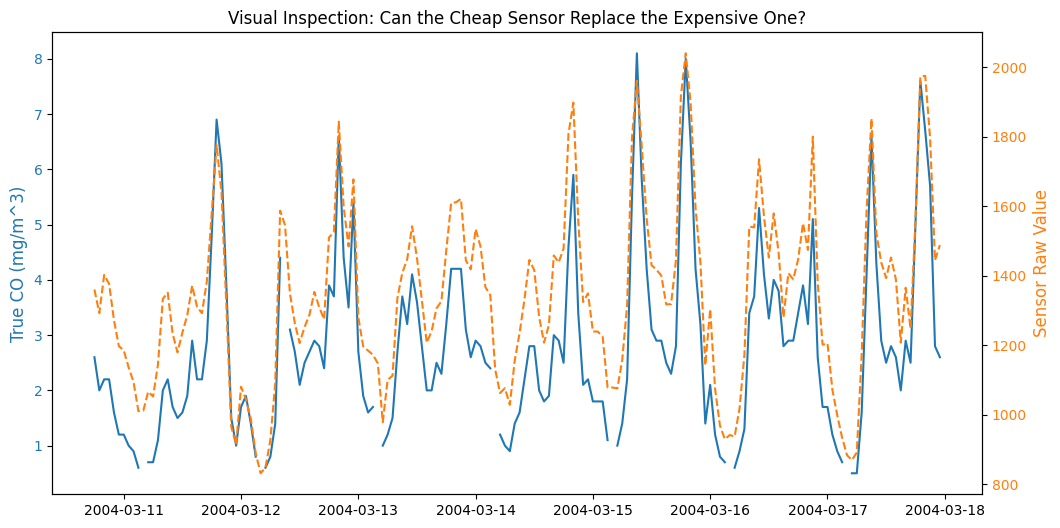

In [52]:
# plot just one week of data to see how data looks
# Sort the index first to ensure monotonic ordering for date slicing
df_sorted = df.sort_index()
# Use boolean indexing with date range 
start_date = pd.Timestamp('2004-03-10 00:00:00')
end_date = pd.Timestamp('2004-03-17 23:59:59')
one_week = df_sorted[(df_sorted.index >= start_date) & (df_sorted.index <= end_date)]

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Truth on Left Axis
color = 'tab:blue'
ax1.set_ylabel('True CO (mg/m^3)', color=color, fontsize=12)
ax1.plot(one_week.index, one_week['CO(GT)'], color=color, label='Ground Truth')
ax1.tick_params(axis='y', labelcolor=color)

# Plot Sensor on Right Axis (because the units are different)
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Sensor Raw Value', color=color, fontsize=12)
ax2.plot(one_week.index, one_week['PT08.S1(CO)'], color=color, linestyle='--', label='Cheap Sensor')
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Visual Inspection: Can the Cheap Sensor Replace the Expensive One?")
plt.show()